<a href="https://colab.research.google.com/github/noobylub/final_coursework/blob/main/coursework_data_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment**
<br>
This research seeks to compare One-Hot-Encoding against Multi-Layer Perceptron, which has be de-facto for many ML problems. 
<br>
The following experiement will be performed and evaluated: 

*   One hot encoding (OHE), sigmoid
*   Multi Layer Perceptron (MLP), sigmoid
*   OHE, softmax  
*   MLP, softmax



**Retrieving the Data and Data Analysis**

In [ ]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

In [1]:
# Run this when editing in code editor 
!curl -O https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.2M  100 21.2M    0     0  5163k      0  0:00:04  0:00:03  0:00:01 5162k   0     0  5649k      0  0:00:03  0:00:03 --:--:-- 5648k


In [ ]:
# Example of what the data looks like
!head -n5 Compiled_Reviews.txt

**Data loading and pre-processing**
<br>
Below we preprocess the data from the raw file "Compiled_reviews.txt"
<br>
We remove any unwanted characters, to improve the integrity of the text corpus. 

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

reviews=[]
sentiment_ratings=[]
product_types=[]
helpfulness_ratings=[]

with open("Compiled_Reviews.txt") as f:
   for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        # remove punctuation/numbers and replace it with a space
        fields[0] = re.sub(r'[.,!?;:()\[\]{}\-—\'\/\"\"\d+]', " ",fields[0])
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        
        helpfulness_ratings.append(fields[3])


**Data Analysis**
<br/>
Below we see what the data looks like after pre-processing
<br/>
Data analysis can also be shown below

In [4]:
index = 0
import re
from collections import Counter
for index in range(len(reviews)):
  print("Review is ",reviews[index])
  print("Sentiment ", sentiment_ratings[index])
  print("Helpfullness is ", helpfulness_ratings[index])
  print("-----------")
  if(index >5):
    break;
# helpfulness_ratings[0:5]

Review is   This is a wonderful album  that evokes memories of the    s folk boom  yet contains original songs  I was amazed at the fantastic harmonies and musical arrangements Anyone who loves the movie   A Mighty Wind   and who loves folk music will fall in love with this album  I know I did 
Sentiment  positive
Helpfullness is  neutral
-----------
Review is   On one hand  this CD is a straight ahead instrumental rocker  but Johnny A really shows how great he is with ballads  such as his covers of   Wichita Lineman    and   Yes it Is     In fact  those two ballads alone are worth the price of the CD by themselves But Johnny A can flat kick your ass  too   He s a biker and his tunes like Oh Yeah  In the Wind and Two Wheel Horse are named for his other hobby   And they rock  but there s nothing cliched or tired in his style   He always seems to be looking for new ways to say something I saw him in person at the Triple Door in Seattle sometime in February      in a power trio format and

Sentiment distribution:
positive: 20972 (57.38%)
negative: 15576 (42.62%)


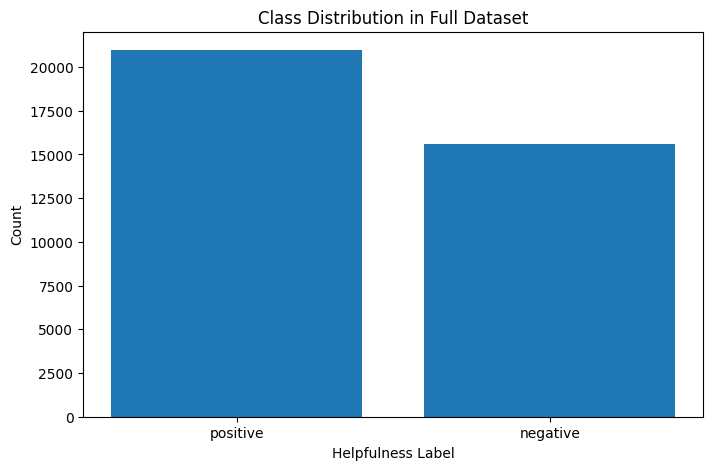

In [5]:
sentiment_distribution = Counter(sentiment_ratings)
total_data = len(sentiment_ratings)

print("Sentiment distribution:")
for sentiment, count in sentiment_distribution.items():
    percentage = (count / total_data) * 100
    print(f"{sentiment}: {count} ({percentage:.2f}%)")


plt.figure(figsize=(8, 5))
plt.bar(sentiment_distribution.keys(), sentiment_distribution.values())
plt.xlabel('Helpfulness Label')
plt.ylabel('Count')
plt.title('Class Distribution in Full Dataset')
plt.show()

Class neutral: 10321 (28.24%)
Class helpful: 20351 (55.68%)
Class unhelpful: 5876 (16.08%)


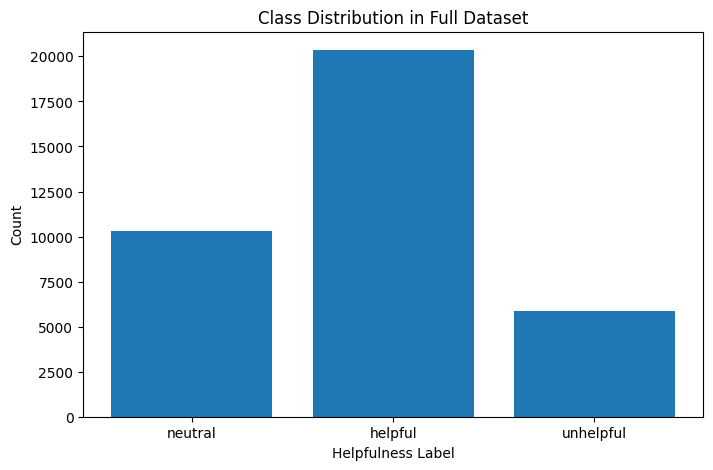

In [5]:
# Class Distribution Analysis 
class_distribution = Counter(helpfulness_ratings)
total_data = len(helpfulness_ratings)


for rating, count in class_distribution.items():
    percentage = (count / total_data) * 100
    print(f"Class {rating}: {count} ({percentage:.2f}%)")


plt.figure(figsize=(8, 5))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Helpfulness Label')
plt.ylabel('Count')
plt.title('Class Distribution in Full Dataset')
plt.show()

**Tokenising Corpus Dataset**
<br/>
Tokenising the words all the words in the reviews database. This will then be used to create the list of features, which would be the columns

In [6]:

# Tokenising it by spaces
tokenised_set = []
for review in reviews:
  # Basically, re.split(' ') results in an array of words split by spaces
  # Then iterate through that array of words and append it individually to tokenised_set
  [tokenised_set.append(tokens) for tokens in re.split(' ', review)]

counts = Counter(tokenised_set)
so_with_content=sorted(counts.items(), key=lambda item: item[1], reverse=True)
so_with_content=list(zip(*so_with_content))[0]


In [7]:
# We want to focus on content words
function_words = []
with open("function_words.txt") as f:
    function_words = f.read().splitlines()
so: list[str] = []
for word in so_with_content:
    if word not in function_words and len(word) > 2:
        so.append(word)

**Creating the sparse embedding**
<br/>
This is a simple sparse embedding of filtered content words of corpus. This will be used as the main features for all classification model. 

**Ensuring Reproducibility**
<br/>
To ensure reproducibility, we will set the random seed to 42.

In [ ]:
import numpy as np

np.random.seed(42)
random.seed(42)

# 8000 Features
word_list = so[0:8000]
M = np.zeros((len(reviews), len(word_list)))
#iterate over the reviews
for i, rev in enumerate(reviews):
  for(j,word) in enumerate(word_list):
    if word in rev:
      M[i,j]=1

In [9]:
# 36548 examples, with 8000 features (words occurence)
M.shape

(36548, 8000)

**Data Split**

In [131]:
train_ints = np.random.choice(len(reviews), int(len(reviews)*0.6), replace=False)
test_train_ints = list(set(range(0, len(reviews))) - set(train_ints))
test_ints = np.random.choice(test_train_ints, int(len(test_train_ints)*0.5), replace=False)
final_test_ints = list(set(test_train_ints) - set(test_ints))  # Use test_train_ints, not range()

In [132]:
print("Training test", len(train_ints))
print("Validation test", len(test_ints))
print("Final test", len(final_test_ints))
print("Total", len(train_ints)+len(test_ints)+len(final_test_ints))

Training test 21928
Validation test 7310
Final test 7310
Total 36548


**Classifiers for Sentiment Analysis**
<br>
Multiple classifiers will be run, and tested againts each other for sentiment analysis classifier.





Experiment for 8000 features, meaning 8000 words
<br>
Below we divide the data into train, validation and test sets

In [133]:
# Divide the features by the training indices
# Select all rows that are in the indices of the respective lists and select all the rows
M_train = M[train_ints,]
M_test = M[test_ints,]
M_final_test = M[final_test_ints,]
sentiment_labels = [sentiment_ratings[i] for i in train_ints]
sentiment_labels_test = [sentiment_ratings[i] for i in test_ints]
sentiment_labels_final_test = [sentiment_ratings[i] for i in final_test_ints]

In [134]:
# Class Distribution Test to check
class_distribution = Counter(sentiment_ratings)
class_distribution_test = Counter(sentiment_labels_test)
class_distribution_final_test = Counter(sentiment_labels_final_test)
class_distribution_train = Counter(sentiment_labels)

print(class_distribution)
print(class_distribution_test)
print(class_distribution_final_test)
print(class_distribution_train)


Counter({'positive': 20972, 'negative': 15576})
Counter({'positive': 4160, 'negative': 3150})
Counter({'positive': 4154, 'negative': 3156})
Counter({'positive': 12658, 'negative': 9270})


In [135]:
print(M_train.shape)
print(M_test.shape)
print(M_final_test.shape)
# Sentiment Labels are ordered list
print(len(sentiment_labels))
print(len(sentiment_labels_test))
print(len(sentiment_labels_final_test))


(21928, 8000)
(7310, 8000)
(7310, 8000)
21928
7310
7310


**Function for Classifiers**
<br/>
This function will be called multiple times to test out different hyperparameters and their effects. 
<br/>
In each training, the function will perform a test on the sentiment_labels_test after finishing training on sentiment_labels_train.
<br/>
The best performing models will be tested further with the last 20 percent to test whether they generalise well or not.

In [136]:
# Function to run Logistic Regression with Sigmoid
def logistic_regresssion_sigmoid(x_dataset,y_dataset,x_test,y_test,num_features,n_iters=1000,lr=0.4,random_seed=42):

    weights = np.random.rand(num_features)
    bias=np.random.rand(1)
    logistic_loss=[]
    num_samples=len(y_dataset)
    for i in range(n_iters):
        # Basically you are multiplying all the values of M_train with the weights
        # It would be similar to this: z= bias + (x[0]*weights[0] + x[1]*weights[1])
        # The values here would be 21928, 5000 and 5000, 1, leading to a matrix of 21928, 1
        z= x_dataset.dot(weights) + bias
        # print(z)
        # (1 / (1+np.exp(-z))) we use sigmoid because we only need to know whether it is positive or negative, two possible values
        q = (1 / (1+np.exp(-z)))
        # print(q)
        eps=0.00001
        # Binary Cross Entropy Loss
        loss = -sum((y*np.log2(q+eps)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q+eps)))/num_samples
        
        
        logistic_loss.append(loss)
        # print(logistic_loss)
        # We then make the prediction, if it is below a certain number, 0.5 it is negative and vice versa
        y_pred=[int(ql > 0.5) for ql in q]

        # For logistic regression one shot encoder= dw1 = np.dot(x[0],q-y)/num_samples
        # dw1 = np.do(x[0], q-y)/num_samples

        dw = (q-y_dataset).dot(x_dataset)/num_samples
        db = sum(q-y_dataset)/num_samples
        weights = weights - dw*lr
        bias = bias - db*lr

    
    # Model test on validation dataset 
    result = LogReg_Sigmoid_Test(weights,bias,x_test,y_test)
    return weights,bias, result, logistic_loss

In [137]:
# Code to invoke the function and test results 
# For this specific function, we expect the labels to be already in string format
def LogReg_Sigmoid_Test(weights,bias,test_dataset,y_test:list):
    # Perform Forward Propagation
    z= test_dataset.dot(weights) + bias
    q = (1 / (1+np.exp(-z)))
    x_test_pred=[int(ql > 0.5) for ql in q]
    
    

    # # Accuracy
    # y_final_test = [int(l=='positive') for l in sentiment_labels_final_test]
    # acc_test = [int(yp == y_final_test[s]) for s,yp in enumerate(y_test_pred)]
    # print("Final Test Accuracy: ", sum(acc_test)/len(acc_test))
    # y_test_compare = ["positive" if s == 1 else "negative" for s in y_test ]
    x_labels=["positive" if s == 1 else "negative" for s in x_test_pred]
    
    # TP
    true_positives=sum([int(yt == "positive" and x_labels[s] == "positive") for s,yt in enumerate(y_test)])

    true_negatives=sum([int(yt == "negative" and x_labels[s] == "negative") for s,yt in enumerate(y_test)])
    
    false_positives = sum([int(yt == "negative" and x_labels[s] == "positive") for s,yt in enumerate(y_test)])
    # FN: actual is POSITIVE, predicted is NEGATIVE  
    false_negatives = sum([int(yt == "positive" and x_labels[s] == "negative") for s,yt in enumerate(y_test)])
    
    
    # print("True Positives: ", true_positives)
    # print("False Positives: ", false_positives)
    # print("False Negatives: ", false_negatives)
    # print("True Negatives: ", true_negatives)
    # Precision
    accuracy = (true_positives+true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
    precision = true_positives/(true_positives+false_positives)
    recall = true_positives/(true_positives+false_negatives)
    f1 = 2*precision*recall/(precision+recall)
    print("--------------")
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
    print("accuracy: ", accuracy)
    return precision, recall, f1, accuracy

**Different Features forLogistic Regression with Logistic Regression and MLP**
<br/>
- 8000 features 
- Learning Rate 
    - 0.4
    - 0.2
    - 0.1
    - 0.05
    <br/>
- This will all be done by running multiple classifiers and storing the results in a dictionary

In [138]:
# List of hyperparameters to be used for training the model
learning_rates = [0.4,0.2,0.1,0.05]

In [139]:
# invoking the function
y=[int(l == "positive") for l in sentiment_labels]
LogReg_models_sigmoid = {}
for lr in learning_rates:
    print("Learning rate: ",lr)
    weights,bias,result,logistic_loss = logistic_regresssion_sigmoid(M_train,y,M_test,sentiment_labels_test,lr=lr,num_features=8000)
    print("-----")
    LogReg_models_sigmoid[lr] = (weights,bias,result,logistic_loss)
    


Learning rate:  0.4
--------------
Precision:  0.7965184662432369
Recall:  0.8139423076923077
F1:  0.8051361312566876
accuracy:  0.7757865937072503
-----
Learning rate:  0.2
--------------
Precision:  0.7635906806761078
Recall:  0.8036057692307692
F1:  0.7830873740922932
accuracy:  0.7466484268125855
-----
Learning rate:  0.1
--------------
Precision:  0.738289443020275
Recall:  0.7615384615384615
F1:  0.7497337593184238
accuracy:  0.7106703146374829
-----
Learning rate:  0.05
--------------
Precision:  0.7034883720930233
Recall:  0.6689903846153846
F1:  0.6858058156727452
accuracy:  0.6511627906976745
-----


**Result for One Hot Encoding**
<br/>
The results will include F1 score, precision, recall, and accuracy.




**Multi-Layer Perceptron**

In [140]:
def MLP_sigmoid(x_dataset,y_dataset,x_test,y_test,num_features,n_iters=1000,lr=0.4):
    

    num_features= M_train.shape[1]
    hidden_size = 32

    
    
    # Weight initialization with He/Xavier weight initialization technique to encourage ReLU activation
    # Np.random will not work
    limit_1 = np.sqrt(6 / (num_features ))
    weights_0_1 = np.random.uniform(-limit_1, limit_1, (num_features, hidden_size))
    limit_2 = np.sqrt(6 / (hidden_size ))
    weights_1_2 = np.random.uniform(-limit_2, limit_2, (hidden_size,1))


    loss_history = []
    
    N = x_dataset.shape[0] # Number of training samples

    for iteration in range(n_iters):

        layer_2_error = 0
        layer_0 = x_dataset

        ## Add forward pass
        layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
        layer_2 = np.dot(layer_1,weights_1_2)
    


        # Then apply sigmoid
        layer_2_s = 1/(1+np.exp(-layer_2))

    
        eps = 1e-8
        q = np.clip(layer_2_s, eps, 1 - eps)
        # BCE Cross Entropy Loss with clipping
        loss = (-np.sum(true_labels * np.log2(q) + (1 - true_labels) * np.log2(1 - q)))/N
        loss_history.append(loss)
        

        ## Add backward pass and update weights
        layer_2_diff = (layer_2_s - y_dataset)

        z1 = np.dot(layer_0, weights_0_1)
        relu_grad = (z1 > 0).astype(float)



        hidden_delta = np.dot(layer_2_diff, weights_1_2.T) * relu_grad

        # Normalize weight updates by N
        weights_1_2 -= lr * (np.dot(layer_1.T, layer_2_diff) / N)
        weights_0_1 -= lr * (np.dot(layer_0.T, hidden_delta) / N)

    result = test_models_MLP_Sigmoid(weights_0_1,weights_1_2,x_test,y_test)
    return weights_0_1,weights_1_2,result, loss_history


In [141]:
# Code to invoke the function and test results 
# For this specific function, we expect the labels to be already in string format
def test_models_MLP_Sigmoid(weights_MLP_1,weights_MLP_2,x_dataset,y_test:list):
    # Forward propagation
    layer_0_final_test = x_dataset
    layer_1_final_test = np.maximum(np.dot(layer_0_final_test, weights_MLP_1), 0)
    layer_2_final_test = np.dot(layer_1_final_test, weights_MLP_2)
    layer_2_s_final_test = 1 / (1 + np.exp(-layer_2_final_test))

    #Converting probabilities
    x_pred = (layer_2_s_final_test > 0.5).astype(int)

    

    # # Accuracy
    x_labels=["positive" if s == 1 else "negative" for s in x_pred]
    
    # TP
    true_positives=sum([int(yt == "positive" and x_labels[s] == "positive") for s,yt in enumerate(y_test)])

    true_negatives=sum([int(yt == "negative" and x_labels[s] == "negative") for s,yt in enumerate(y_test)])
    
    false_positives = sum([int(yt == "negative" and x_labels[s] == "positive") for s,yt in enumerate(y_test)])
    
    # FN: actual is POSITIVE, predicted is NEGATIVE  
    false_negatives = sum([int(yt == "positive" and x_labels[s] == "negative") for s,yt in enumerate(y_test)])
    
    
    
    # Precision
    accuracy = (true_positives+true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
    precision = true_positives/(true_positives+false_positives)
    recall = true_positives/(true_positives+false_negatives)
    f1 = 2*precision*recall/(precision+recall)
    print("----------")
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
    print("accuracy: ", accuracy)
    return precision, recall, f1, accuracy


In [142]:
true_labels = np.array([int(l=='positive') for l in sentiment_labels]).reshape(-1,1)
# invoking the function
MLP_models_sigmoid = {}
for lr in learning_rates:
    print("*******")
    print("Learning rate: ",lr)
    weights,bias,result,logistic_loss = MLP_sigmoid(M_train,true_labels,M_test,sentiment_labels_test,lr=lr,num_features=8000)
    print("-----")
    MLP_models_sigmoid[lr] = (weights,bias,result,logistic_loss)
    


*******
Learning rate:  0.4
----------
Precision:  0.8202294942626435
Recall:  0.9278846153846154
F1:  0.8707421610647417
accuracy:  0.8432284541723666
-----
*******
Learning rate:  0.2
----------
Precision:  0.8611306591602158
Recall:  0.8824519230769231
F1:  0.8716609284103051
accuracy:  0.8521203830369357
-----
*******
Learning rate:  0.1
----------
Precision:  0.8573099415204678
Recall:  0.8810096153846154
F1:  0.8689982216953172
accuracy:  0.8488372093023255
-----
*******
Learning rate:  0.05
----------
Precision:  0.8503147586850082
Recall:  0.8766826923076924
F1:  0.8632974316487159
accuracy:  0.8419972640218878
-----


**Classification for Helpfulness** 
<br>
- Logistic Regression 
- Multi-Layer Perceptron


Divide the Helpfullness Y into 3 classes: 0, 1, and 2, and to three sets: train, validation, and test.

In [143]:
# Sort to ensure consistent ordering
unique_labels = sorted(list(set(helpfulness_ratings)))
unique_one_hot = np.diag(np.ones(len(unique_labels)))


labels_train = [helpfulness_ratings[i] for i in train_ints]
labels_test = [helpfulness_ratings[i] for i in test_ints]
labels_dev = [helpfulness_ratings[i] for i in final_test_ints]

# Make sure you're using the right label variables
y_train = np.array([list(unique_one_hot[k]) for k in [unique_labels.index(x) for x in labels_train]]).T
y_test = np.array([list(unique_one_hot[k]) for k in [unique_labels.index(x) for x in labels_test]]).T
y_dev = np.array([list(unique_one_hot[k]) for k in [unique_labels.index(x) for x in labels_dev]]).T

In [144]:
# Dataset example 
train_distribution = Counter(labels_train)
print(train_distribution)
test_distribution = Counter(labels_test)
print(test_distribution)
dev_distribution = Counter(labels_dev)
print(dev_distribution)


Counter({'helpful': 12170, 'neutral': 6218, 'unhelpful': 3540})
Counter({'helpful': 4078, 'neutral': 2080, 'unhelpful': 1152})
Counter({'helpful': 4103, 'neutral': 2023, 'unhelpful': 1184})


In [145]:
print(y_train.shape)
print(y_test.shape)
print(y_dev.shape)

(3, 21928)
(3, 7310)
(3, 7310)


**Logistic Regression**

In [146]:
def LogisticRegression_Softmax(x_train_data, y_train_data,x_test,y_test,lr =0.1,n_iters=1000,random_seed=42):
    np.random.seed(random_seed)
    

    num_features = x_train_data.shape[1]
    num_classes = y_train_data.shape[0]
    num_samples = x_train_data.shape[0]

    # Initialize weights with correct dimensions: (num_features, num_classes)
    weights = np.random.rand(num_features, num_classes) # (8000,3)
    bias = np.zeros(num_classes) # (3,)
    
    logistic_loss=[]



    # # x and y now refer to the training data for intent classification
    x_train_data = x_train_data  # Shape (num_samples, num_features) (21928, 8000)
    y_train_targets = y_train_data.T # Shape (num_samples, num_classes) (3, 21928)
    # print(x_train_data.shape)
    # print(y_train_targets.shape)




    for i in range(n_iters):

        # z = x.dot(weights) expects x to be (num_samples, num_features) and weights to be (num_features, num_classes)
        z= x_train_data.dot(weights) + bias
        
        # Softmax 
        exp_z = np.exp(z)
        q = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        # exp_z = np.exp(z)
        # q = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        
        # Calculate loss using y_train_targets
        eps = 1e-12
        # Softmax cross entropy loss with clipping to prevent log(0)
        loss = (-np.sum(y_train_targets*np.log2(np.clip(q, eps, 1.0)))) / num_samples # avoid log(0)
    
        logistic_loss.append(loss)

        # dw = x.T.dot((q-y)) expects x.T to be (num_features, num_samples) and (q-y) to be (num_samples, num_classes)
        # Here x_train_data.T is (num_features, num_samples)
        db = np.sum((q-y_train_targets), axis=0)/num_samples
        dw=x_train_data.T.dot((q-y_train_targets))/num_samples
        weights=(weights - (dw*lr))
        bias=(bias - (db*lr))
    result = LogReg_Softmax_Test(weights,bias,x_test,y_test)
    return weights,bias,result,logistic_loss

In [147]:
def LogReg_Softmax_Test(weights,bias,x_dataset,y_dataset):
    # Forward pass on test data
    z_test = x_dataset.dot(weights) + bias
    # Perform theSoftmax
    exp_z_test = np.exp(z_test)
    q_test = exp_z_test / np.sum(exp_z_test, axis=1, keepdims=True)
    # Get predictions, basically get the class with highest probability
    y_pred_test = np.argmax(q_test, axis=1)  # Shape: (7310,)

    # Get true labels
    y_test_targets = y_dataset.T  
    y_true_test = np.argmax(y_test_targets, axis=1)  # Shape: (7310,)

    # Calculate accuracy
    accuracy_test = np.mean(y_pred_test == y_true_test)
    print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
    TP = []
    FP = []
    FN = []
    for j in range(3):
        TP.append(np.sum(np.array([int(s == j and y_true_test[i] == j) for i,s in enumerate(y_pred_test)])))
        FP.append(np.sum(np.array([int(s == j and y_true_test[i] != j) for i,s in enumerate(y_pred_test)])))
        FN.append(np.sum(np.array([int(s != j and y_true_test[i] == j) for i,s in enumerate(y_pred_test)])))
    
    precision = np.array(TP)/(np.array(TP)+np.array(FP))
    recall = np.array(TP)/(np.array(TP)+np.array(FN))
    f1 = 2*precision*recall/(precision+recall)
    print(precision)
    print(recall)
    print(f1)

In [148]:

LogReg_models_softmax = {}
for lr in learning_rates:
    print("Learning rate: ",lr)
    weights,bias,result,loss = LogisticRegression_Softmax(M_train,y_train,M_test,y_test,lr=lr) 
    print("-----")
    LogReg_models_softmax[lr] = (weights,bias,result,loss)
    


Learning rate:  0.4
Test Accuracy: 52.38%
[0.61472419 0.36960179 0.35253456]
[0.70230505 0.31682692 0.265625  ]
[0.65560261 0.34118561 0.3029703 ]
-----
Learning rate:  0.2
Test Accuracy: 51.11%
[0.60481617 0.35097493 0.33912037]
[0.68979892 0.30288462 0.25434028]
[0.64451827 0.32516129 0.2906746 ]
-----
Learning rate:  0.1
Test Accuracy: 49.71%
[0.59649891 0.32845528 0.33743017]
[0.66846493 0.29134615 0.26215278]
[0.63043478 0.30878981 0.29506595]
-----
Learning rate:  0.05
Test Accuracy: 48.39%
[0.58892064 0.31626667 0.29909707]
[0.65693968 0.28509615 0.23003472]
[0.62107337 0.29987358 0.26005888]
-----


**MultiLayer Perceptron**

In [149]:
def MLP_softmax(x_train,y_train,x_test,y_test,lr=0.1,hidden_size=16,n_iters=1000,):
    # Add more layers for hte multilayer perceptron
    num_features= x_train.shape[1]
    num_classes = 3

    helpfulness_labels = y_train # 3,2198
    np.random.seed(1)

    # Intitiliasation method based on Xavier's proposed method 
    # https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf#page=4.98
    limit_1 = np.sqrt(6 / (num_features ))
    weights_0_1 = np.random.uniform(-limit_1, limit_1, (num_features, hidden_size))
    limit_2 = np.sqrt(6 / (hidden_size ))
    weights_1_2 = np.random.uniform(-limit_2, limit_2, (hidden_size,num_classes))
    y_train_target = y_train.T

    loss_history = []
    
    num_samples = x_train.shape[0] # Number of training samples

    for iteration in range(n_iters):

        layer_2_error = 0
        layer_0 = x_train

        ## Add forward pass
        layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
        layer_2 = np.dot(layer_1,weights_1_2)
    


        # Then apply sigmoid
        # layer_2_s = 1/(1+np.exp(-layer_2))
        exp_z = np.exp(layer_2)
        layer_2_s = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        q = layer_2_s


    
        eps = 1e-8
         # Softmax cross entropy loss with clipping to prevent log(0)
        loss = -(np.sum(y_train.T*np.log2(np.clip(q, eps, 1.0))))/num_samples  # avoid log(0)
        loss_history.append(loss)
        

        ## Add backward pass and update weights
        layer_2_diff = (layer_2_s - y_train_target)

        z1 = np.dot(layer_0, weights_0_1)
        relu_grad = (z1 > 0).astype(float)



        hidden_delta = np.dot(layer_2_diff, weights_1_2.T) * relu_grad

        # Normalize weight updates by N
        weights_1_2 -= lr   * (np.dot(layer_1.T, layer_2_diff) /num_samples)
        weights_0_1 -= lr * (np.dot(layer_0.T, hidden_delta) / num_samples)
    result = MLP_softmax_test(weights_0_1,weights_1_2,x_test,y_test)    
    return weights_0_1, weights_1_2,result, loss_history


In [150]:
def MLP_softmax_test(weights_0_1, weights_1_2, x_dataset,y_dataset):
    layer_0_test = x_dataset    
    layer_1_test = np.maximum(np.dot(layer_0_test, weights_0_1), 0)  # ReLU activation
    layer_2_test = np.dot(layer_1_test, weights_1_2)

    # Apply softmax
    exp_z_test = np.exp(layer_2_test)
    layer_2_s_test = exp_z_test / np.sum(exp_z_test, axis=1, keepdims=True)

    # Get predictions (class with highest probability)
    y_pred_test = np.argmax(layer_2_s_test, axis=1)

    # Get true labels
    y_true_test = np.argmax(y_dataset.T, axis=1)

    # Calculate accuracy
    accuracy_test = np.mean(y_pred_test == y_true_test)
    print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
    TP = []
    FP = []
    FN = []
    for j in range(3):
        TP.append(np.sum(np.array([int(s == j and y_true_test[i] == j) for i,s in enumerate(y_pred_test)])))
        FP.append(np.sum(np.array([int(s == j and y_true_test[i] != j) for i,s in enumerate(y_pred_test)])))
        FN.append(np.sum(np.array([int(s != j and y_true_test[i] == j) for i,s in enumerate(y_pred_test)])))
    
    precision = np.array(TP)/(np.array(TP)+np.array(FP))
    recall = np.array(TP)/(np.array(TP)+np.array(FN))
    f1 = 2*precision*recall/(precision+recall)
    print(precision)
    print(recall)
    print(f1)

In [151]:
MLP_models_softmax = {}
for lr in learning_rates:
    print("Learning rate: ",lr)
    weights,bias,result,loss = MLP_softmax(M_train,y_train,M_test,y_test,lr=lr) 
    print("-----")
    MLP_models_softmax[lr] = (weights,bias,result,loss)


Learning rate:  0.4
Test Accuracy: 47.28%
[0.66738973 0.34464752 0.38468551]
[0.45267288 0.57115385 0.36631944]
[0.53945061 0.42988963 0.3752779 ]
-----
Learning rate:  0.2
Test Accuracy: 51.22%
[0.64084314 0.37582588 0.40221402]
[0.57405591 0.46490385 0.37847222]
[0.60561376 0.41564582 0.38998211]
-----
Learning rate:  0.1
Test Accuracy: 55.55%
[0.61622589 0.41955193 0.42574257]
[0.75993134 0.29711538 0.29861111]
[0.68057538 0.34787504 0.35102041]
-----
Learning rate:  0.05
Test Accuracy: 57.22%
[0.59870281 0.448737   0.45032051]
[0.88278568 0.14519231 0.24392361]
[0.71350709 0.21939702 0.31644144]
-----


In [5]:
MLP_softmax_test(MLP_models_softmax[0.05][0],MLP_models_softmax[0.05][1],M_train,y_train)
# MLP_models_softmax[0.05]

NameError: name 'MLP_softmax_test' is not defined

**Further Analysis on Result**
<br/>
Below we perform further analysis on the result, comparing the two models. 

In [2]:
# Methods to perform forward propagation to conduct further error slice analysis 
def LogReg_ForwardPass(weights, bias, x_dataset, Sigmoid:bool):
    if(Sigmoid):
        z= x_dataset.dot(weights) + bias
        q = (1 / (1+np.exp(-z)))
        x_test_pred=[int(ql > 0.5) for ql in q]
        return x_test_pred, q
    else:
       z_test = x_dataset.dot(weights) + bias
       # Perform theSoftmax
       exp_z_test = np.exp(z_test)
       q_test = exp_z_test / np.sum(exp_z_test, axis=1, keepdims=True)
       # Get predictions, basically get the class with highest probability
       y_test_pred = np.argmax(q_test, axis=1)  # Shape: (7310,)
       return y_test_pred,q_test

def MLP_ForwardPass(weights_0_1,weights_1_2,x_dataset, Sigmoid:bool):
    if(Sigmoid):
        layer_0_final_test = x_dataset
        layer_1_final_test = np.maximum(np.dot(layer_0_final_test, weights_0_1), 0)
        layer_2_final_test = np.dot(layer_1_final_test, weights_1_2)
        layer_2_s_final_test = 1 / (1 + np.exp(-layer_2_final_test))

        #Converting probabilities
        x_pred = (layer_2_s_final_test > 0.5).astype(int)
        return x_pred, layer_2_s_final_test
    else:
        layer_0_test = x_dataset    
        layer_1_test = np.maximum(np.dot(layer_0_test, weights_0_1), 0)  # ReLU activation
        layer_2_test = np.dot(layer_1_test, weights_1_2)

        # Apply softmax
        exp_z_test = np.exp(layer_2_test)
        layer_2_s_test = exp_z_test / np.sum(exp_z_test, axis=1, keepdims=True)

        # Get predictions (class with highest probability)
        y_pred_test = np.argmax(layer_2_s_test, axis=1)
        return y_pred_test, layer_2_s_test

**Conducting Error Analysis**
<br/>
- What can MLP capture that Logistic Regression cannot or vice versa ?
<br/>
- Can MLP gather some context despite having a one-hot-encoded features, context where Logistic Regression fails ? 
<br/>
- If an example has words with heavy weight according to Logistic Regression, does an MLP model capture those examples correctly ? 

In [4]:
print(LogReg_models_sigmoid)
print(LogReg_models_softmax)
print(MLP_models_sigmoid)
print(MLP_models_softmax)


NameError: name 'LogReg_models_sigmoid' is not defined

In [3]:
# Error slice analysis
# What can MLP capture that Logistic Regression cannot and vice versa ? 

# Get predictions from both models
logreg_preds, logreg_probs = LogReg_ForwardPass(weights, bias, M_test, Sigmoid=True)
mlp_preds, mlp_probs = MLP_ForwardPass(w0, w1, M_test, Sigmoid=True)

# Get true labels
true_labels = np.array([int(l == "positive") for l in sentiment_labels_test])

# Create error slices
mlp_correct = (mlp_preds.flatten() == true_labels)
logreg_correct = (logreg_preds == true_labels)

mlp_wins = mlp_correct & ~logreg_correct
logreg_wins = logreg_correct & ~mlp_correct
 


NameError: name 'weights' is not defined